# Computation DAG for Fibonacci

In [1]:
import collections

import graphviz
from typeguard import typechecked

In [2]:
FibonacciResult = collections.namedtuple('FibonacciResult', ('value', 'graph'))

FibonacciResult.__doc__ = """A Fibonacci number and the computation DAG behind it."""

In [3]:
@typechecked
def fibonacci(index: int) -> FibonacciResult:
    """Compute a Fibonacci number and the computation DAG needed to compute it."""
    if index < 0:
        raise ValueError('negative Fibonacci sequence index not allowed')
    
    memo = {0: 0, 1: 1}
    graph = graphviz.Digraph()
    
    @typechecked
    def fib(parent: int | None, child: int) -> int:
        if parent is not None:
            graph.edge(str(parent), str(child))
        
        if child not in memo:
            memo[child] = fib(child, child - 2) + fib(child, child - 1)
        
        return memo[child]
    
    return FibonacciResult(fib(None, index), graph)

In [4]:
result = fibonacci(10)
result.value

55

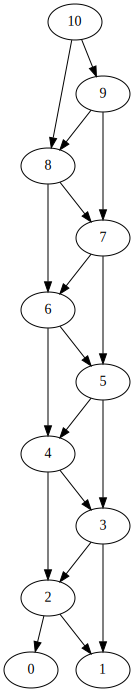

In [5]:
result.graph